# Reducer Functions in Action

### Set the OpenAI API Key as an Environment Variable

In [1]:
%load_ext dotenv
%dotenv
%load_ext mypy_ipython

### Import Relevant Classes and Functions

In [2]:
from langgraph.graph import START, END, StateGraph, add_messages
from typing_extensions import TypedDict
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.messages import AIMessage, HumanMessage, BaseMessage
from collections.abc import Sequence
from typing import Literal, Annotated

### Get Familiar with the add_messages Function

In [3]:
my_list = add_messages([HumanMessage("Hi! I'm Oscar."), 
                        AIMessage("Hey, Oscar. How can I assist you?")],
                       [HumanMessage("Could you summarize today's news?")])

In [4]:
my_list

[HumanMessage(content="Hi! I'm Oscar.", additional_kwargs={}, response_metadata={}, id='c505cc6b-b2df-4951-b87a-91492c73c2b6'),
 AIMessage(content='Hey, Oscar. How can I assist you?', additional_kwargs={}, response_metadata={}, id='d33241b3-3fcc-4884-a3b0-1fc2acc250da'),
 HumanMessage(content="Could you summarize today's news?", additional_kwargs={}, response_metadata={}, id='a4f164b0-0d2e-4d75-874f-fab3b0aa3c54')]

### Define the State

In [5]:
class State(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

### Define the Nodes

In [6]:
chat = ChatOpenAI(model = "gpt-4o", 
                  seed = 365, 
                  temperature = 0, 
                  max_completion_tokens = 100)

In [7]:
def ask_question(state: State) -> State:
    
    print(f"\n-------> ENTERING ask_question:")
    for i in state["messages"]:
        i.pretty_print()
    
    question = "What is your question?"
    print(question)
    
    return State(messages = [AIMessage(question), HumanMessage(input())])

In [8]:
def chatbot(state: State) -> State:
    
    print(f"\n-------> ENTERING chatbot:")
    for i in state["messages"]:
        i.pretty_print()
    
    response = chat.invoke(state["messages"])
    response.pretty_print()
    
    return State(messages = [response])

In [9]:
def ask_another_question(state: State) -> State:
    
    print(f"\n-------> ENTERING ask_another_question:")
    for i in state["messages"]:
        i.pretty_print()
    
    question = "Would you like to ask one more question (yes/no)?"
    print(question)
    
    return State(messages = [AIMessage(question), HumanMessage(input())])

### Define the Routing Function

In [10]:
def routing_function(state: State) -> Literal["ask_question", "__end__"]:
    
    if state["messages"][-1].content == "yes":
        return "ask_question"
    else:
        return "__end__"

### Define the Graph

In [11]:
graph = StateGraph(State)

In [12]:
graph.add_node("ask_question", ask_question)
graph.add_node("chatbot", chatbot)
graph.add_node("ask_another_question", ask_another_question)

graph.add_edge(START, "ask_question")
graph.add_edge("ask_question", "chatbot")
graph.add_edge("chatbot", "ask_another_question")
graph.add_conditional_edges(source = "ask_another_question", 
                            path = routing_function)

In [13]:
graph_compiled = graph.compile()

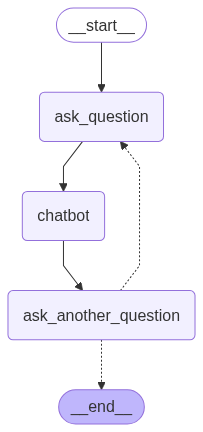

In [14]:
graph_compiled

### Test the Graph

In [15]:
graph_compiled.invoke(State(messages = []))


-------> ENTERING ask_question:
What is your question?


 Could you tell me a grook by Piet Hein?



-------> ENTERING chatbot:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

Could you tell me a grook by Piet Hein?
================================== Ai Message ==================================

Certainly! Here's a well-known grook by Piet Hein:

**The Road to Wisdom**

The road to wisdom?—Well, it's plain
and simple to express:
Err
and err
and err again,
but less
and less
and less.

-------> ENTERING ask_another_question:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

Could you tell me a grook by Piet Hein?
================================== Ai Message ==================================

Certainly! Here's a well-known grook by Piet Hein:

**The Road to Wisdom**

The road to wisdom?—Well, it's plain
and simpl

 yes



-------> ENTERING ask_question:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

Could you tell me a grook by Piet Hein?
================================== Ai Message ==================================

Certainly! Here's a well-known grook by Piet Hein:

**The Road to Wisdom**

The road to wisdom?—Well, it's plain
and simple to express:
Err
and err
and err again,
but less
and less
and less.
================================== Ai Message ==================================

Would you like to ask one more question (yes/no)?
================================ Human Message =================================

yes
What is your question?


 Where was the poet born?



-------> ENTERING chatbot:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

Could you tell me a grook by Piet Hein?
================================== Ai Message ==================================

Certainly! Here's a well-known grook by Piet Hein:

**The Road to Wisdom**

The road to wisdom?—Well, it's plain
and simple to express:
Err
and err
and err again,
but less
and less
and less.
================================== Ai Message ==================================

Would you like to ask one more question (yes/no)?
================================ Human Message =================================

yes
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

Where was the poet born?
================================== Ai Mess

 no


{'messages': [AIMessage(content='What is your question?', additional_kwargs={}, response_metadata={}, id='31b37e30-088e-472a-a516-3d446da08f73'),
  HumanMessage(content='Could you tell me a grook by Piet Hein?', additional_kwargs={}, response_metadata={}, id='2deaf34f-daf4-448f-96a6-88524d79a2bc'),
  AIMessage(content="Certainly! Here's a well-known grook by Piet Hein:\n\n**The Road to Wisdom**\n\nThe road to wisdom?—Well, it's plain\nand simple to express:\nErr\nand err\nand err again,\nbut less\nand less\nand less.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 27, 'total_tokens': 79, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-Bz3iRdTwhdBAictkqP7XZuapkPLwk', 'service_